# AML Lab 1, Done by Shawn Nassabi (san7522)

## Ex 1, Visualizing and Analyzing the Dataset

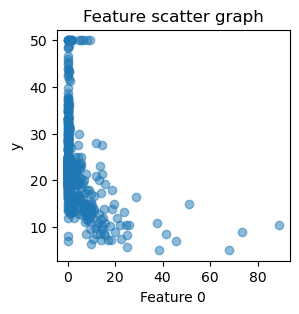

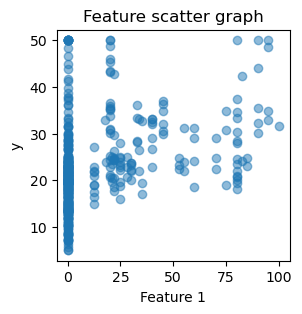

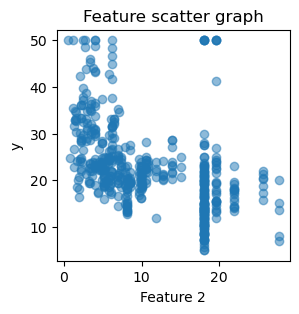

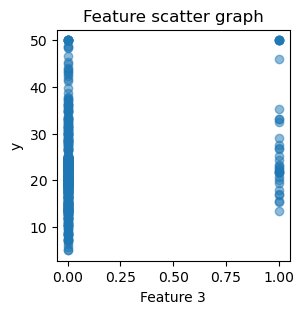

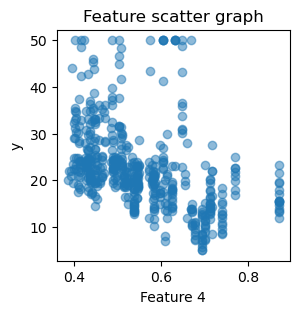

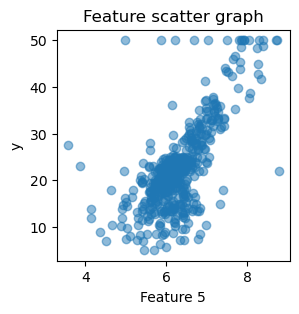

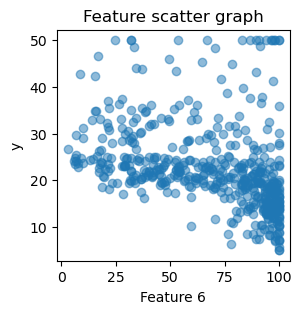

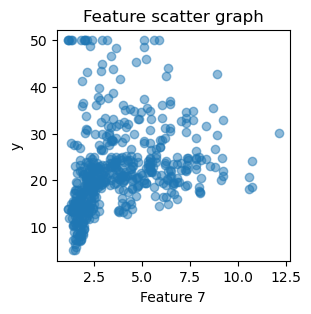

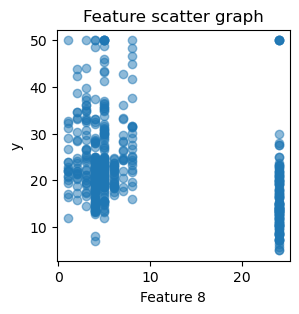

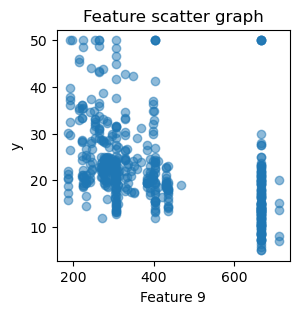

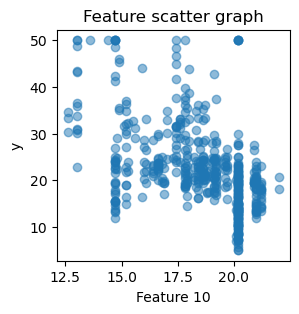

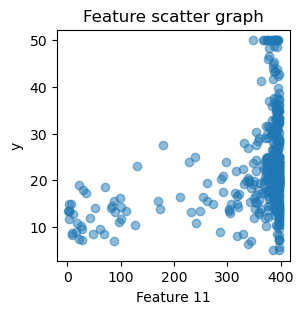

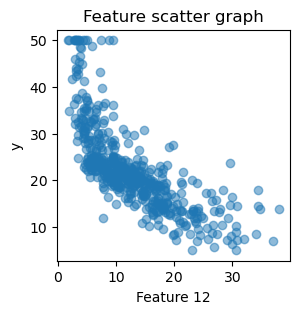

In [464]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

## Avoid printing out warnings
with warnings.catch_warnings():
     warnings.filterwarnings("ignore")
     X, y = load_boston(return_X_y=True)

#print("Hello world")
for i in range(X.shape[1]):
    feature_data = X[:, i]
    plt.figure(figsize=(3,3))
    plt.title("Feature scatter graph")
    plt.xlabel("Feature {}".format(i))
    plt.ylabel("y")
    plt.scatter(feature_data, y, alpha=0.5)
plt.show()

## Ex 3, Linear Regression Closed Form and K Fold Cross Validation:

In [463]:
from sklearn.model_selection import KFold

SPLITS = 10
kf = KFold(n_splits=SPLITS) # Used for k fold cross validation

## Avoid printing out warnings
with warnings.catch_warnings():
     warnings.filterwarnings("ignore")
     X, y = load_boston(return_X_y=True) # Load dataset

y = y.reshape((-1,1)) # Reshape y so that it is a vector with a single column

def closed_form_lin_theta(X_, y_): # Function to calculate the theta using normal closed form
    m = X_.shape[0]
    X_ones = np.concatenate((np.ones((m,1)), X_), axis=1) # add column of ones to start of X
    theta = np.linalg.inv(X_ones.T.dot(X_ones)).dot(X_ones.T).dot(y_)
    return theta

def get_predictions(theta, X_): # Use provided theta and data to get predictions
    m = X_.shape[0]
    X_ones = np.concatenate((np.ones((m,1)), X_), axis=1)
    return X_ones.dot(theta)

def mse(y_, y_h): # Calculate mean square error between actual data and predicted data (y and y hat) to use for scoring
    m = y_.shape[0]
    diff = y_h - y_
    error = 0
    for i in range(m):
        error += diff[i]**2
    return error / m

train_errors = [] # Store training data mse
test_errors = [] # Store test data mse during k fold cross validation

for train, test in kf.split(X):
    X_train = X[train]
    X_test = X[test]
    y_train = y[train]
    y_test = y[test]
    # print (X_train.shape, X_test.shape)
    # print(y_train.shape, y_test.shape)
    theta = closed_form_lin_theta(X_train, y_train)
    #print(theta)
    train_predictions = get_predictions(theta, X_train) 
    train_error = mse(y_train, train_predictions) # Get mse for the training data predictions
    test_predictions = get_predictions(theta, X_test)
    test_error = mse(y_test, test_predictions) # Get mse for the testing data predictions
    train_errors.append(train_error)
    test_errors.append(test_error)

avg_train_error = np.sum(train_errors) / SPLITS
avg_test_error = np.sum(test_errors) / SPLITS
print("Average training error = ", avg_train_error)
print("Average test error = ", avg_test_error)


Average training error =  21.39939241710581
Average test error =  34.705255944528496


## Ex 4 and 5, Ridge Regression closed form with K-Fold Cross Validation and finding best Alpha:

In [467]:
from sklearn.model_selection import KFold

## Avoid printing out warnings
with warnings.catch_warnings():
     warnings.filterwarnings("ignore")
     X, y = load_boston(return_X_y=True) # Load dataset

SPLITS = 10
kf = KFold(n_splits=SPLITS) # Used for k fold cross validation

y = y.reshape((-1,1))

ALPHAS = np.logspace(1, 7, num=13) # List of alphas to try for the regularization

def closed_form_lin_ridge_theta(X_, y_, alpha): # Function to calculate the theta using normal closed form for ridge regression
    m = X_.shape[0]
    X_ones = np.concatenate((np.ones((m,1)), X_), axis=1) # add column of ones to start of X
    n = X_ones.shape[1]
    A = np.eye(n) # Identity matrix
    A[0][0] = 0 # Set top left element of matrix to 0 so bias is not regularized
    theta = np.linalg.inv(X_ones.T.dot(X_ones) + alpha*A).dot(X_ones.T).dot(y_)
    return theta

def get_predictions(theta, X_): # Use provided theta and data to get predictions
    m = X_.shape[0]
    X_ones = np.concatenate((np.ones((m,1)), X_), axis=1)
    return X_ones.dot(theta)

def mse(y_, y_h): # Calculate mean square error between actual data and predicted data (y and y hat) to use for scoring
    m = y_.shape[0]
    diff = y_h - y_
    error = 0
    for i in range(m):
        error += diff[i]**2
    return error / m

avg_train_errors = []
avg_test_errors = []

for alpha in ALPHAS: # Iterate over ALPHAS to find best one
    train_errors = []
    test_errors = []
    for train, test in kf.split(X): # run k fold cross validation for each alpha and record results
        X_train, X_test = X[train], X[test]
        y_train, y_test = y[train], y[test]
        theta = closed_form_lin_ridge_theta(X_train, y_train, alpha) # get theta using linear ridge regression closed form
        
        train_predictions = get_predictions(theta, X_train) 
        train_error = mse(y_train, train_predictions) # Get mse for the training data predictions
        test_predictions = get_predictions(theta, X_test)
        test_error = mse(y_test, test_predictions) # Get mse for the testing data predictions
        train_errors.append(train_error)
        test_errors.append(test_error)

    
    avg_train_error = np.sum(train_errors) / SPLITS # Get avg train error for current alpha
    avg_test_error = np.sum(test_errors) / SPLITS # Get avg test error for current alpha
    #print(avg_test_error)
    avg_train_errors.append(avg_train_error)
    avg_test_errors.append(avg_test_error)

# Check which alpha had lowest avg test error:
min = 1000
minIndex = -1 # Will store index of best alpha (alpha with lowest test error)
for i in range(0, len(avg_test_errors)):
    if avg_test_errors[i] < min:
        min = avg_test_errors[i]
        minIndex = i

print("Best alpha is:", ALPHAS[minIndex])
print("Average training error:", avg_train_errors[minIndex])
print("Average test error:", avg_test_errors[minIndex])

Best alpha is: 100.0
Average training error: 23.609927954689805
Average test error: 29.61522009733452


## Ex 6, Ridge Regression with Polynomial Features

In [468]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

## Avoid printing out warnings
with warnings.catch_warnings():
     warnings.filterwarnings("ignore")
     X, y = load_boston(return_X_y=True) # Load dataset

SPLITS = 10
kf = KFold(n_splits=SPLITS) # Used for k fold cross validation
poly = PolynomialFeatures(degree=2)

X_p = poly.fit_transform(X) # Transform dataset by polynomial degree 2
y = y.reshape((-1,1)) # Reshape y so it is a vector with a single column

ALPHAS = np.logspace(1, 7, num=13) # List of alphas to try for the regularization

# NOTE: The following is very similar to the previous exercise. I have just used the polynomial transformed X instead

def closed_form_poly_theta(X_, y_, alpha): # Function to calculate the theta using normal closed form for ridge regression
    m = X_.shape[0]
    X_ones = np.concatenate((np.ones((m,1)), X_), axis=1) # add column of ones to start of X
    n = X_ones.shape[1]
    A = np.eye(n) # Identity matrix
    A[0][0] = 0 # Set top left element of matrix to 0 so bias is not regularized
    theta = np.linalg.inv(X_ones.T.dot(X_ones) + alpha*A).dot(X_ones.T).dot(y_)
    return theta

def get_predictions(theta, X_): # Use provided theta and data to get predictions
    m = X_.shape[0]
    X_ones = np.concatenate((np.ones((m,1)), X_), axis=1)
    return X_ones.dot(theta)

def mse(y_, y_h): # Calculate mean square error between actual data and predicted data (y and y hat) to use for scoring
    m = y_.shape[0]
    diff = y_h - y_
    error = 0
    for i in range(m):
        error += diff[i]**2
    return error / m

avg_train_errors = []
avg_test_errors = []

for alpha in ALPHAS:
    train_errors = []
    test_errors = []
    for train, test in kf.split(X):
        X_train, X_test = X_p[train], X_p[test] # Using polynomial transformed X_p
        y_train, y_test = y[train], y[test]
        theta = closed_form_lin_ridge_theta(X_train, y_train, alpha) # get theta using linear ridge regression closed form
        
        train_predictions = get_predictions(theta, X_train) 
        train_error = mse(y_train, train_predictions) # Get mse for the training data predictions
        test_predictions = get_predictions(theta, X_test)
        test_error = mse(y_test, test_predictions) # Get mse for the testing data predictions
        train_errors.append(train_error)
        test_errors.append(test_error)

    
    avg_train_error = np.sum(train_errors) / SPLITS # Get avg train error for current alpha
    avg_test_error = np.sum(test_errors) / SPLITS # Get avg test error for current alpha
    #print(avg_test_error)
    avg_train_errors.append(avg_train_error)
    avg_test_errors.append(avg_test_error)

# Check which alpha had lowest avg test error:
min = 1000
minIndex = -1 # Will store index of best alpha (alpha with lowest test error)
#print(avg_test_errors)
for i in range(0, len(avg_test_errors)):
    if avg_test_errors[i] < min:
        min = avg_test_errors[i]
        minIndex = i

print("Best alpha is:", ALPHAS[minIndex])
print("Average training error:", avg_train_errors[minIndex])
print("Average test error:", avg_test_errors[minIndex])
#print(avg_train_errors)
#print(avg_test_errors)

Best alpha is: 1000000.0
Average training error: 12.74752528399534
Average test error: 30.06817140212619


## Ex 7, Multivariate Linear Regression using Gradient Descent

In [470]:
## Avoid printing out warnings
with warnings.catch_warnings():
     warnings.filterwarnings("ignore")
     X, y = load_boston(return_X_y=True) # Load dataset

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / X_std # Normalize X

y = y.reshape((-1,1)) # Reshape y so it is a vector with a single column
ones = np.ones((X.shape[0], 1))
X_b = np.concatenate((ones, X_normalized), axis=1) # add column of ones to start of X
LEARNING_RATE = 0.06
EPOCHS = 1000


def gradient_descent(lRate, X_, y_, epochs):
    m = X_.shape[0]
    theta = np.zeros((14, 1))
    for i in range(epochs):
        theta = theta - lRate * ((2/m) * X_.T.dot(X_.dot(theta) - y_))
    return theta

def mse(y_, y_h): # Calculate mean square error between actual data and predicted data (y and y hat) to use for scoring
    m = y_.shape[0]
    diff = y_h - y_
    error = 0
    for i in range(m):
        error += diff[i]**2
    return error / m

def get_predictions(theta, X_): # Use provided theta and data to get predictions
    m = X_.shape[0]
    X_ones = np.concatenate((np.ones((m,1)), X_), axis=1)
    return X_ones.dot(theta)

theta = gradient_descent(LEARNING_RATE, X_b, y, EPOCHS)
preds = get_predictions(theta, X_normalized)
error = mse(y, preds)
print("The MSE value is =", error)

The MSE value is = [21.89483135]


## Ex 8, Implement Lasso with Gradient Descent

In [471]:
## Avoid printing out warnings
with warnings.catch_warnings():
     warnings.filterwarnings("ignore")
     X, y = load_boston(return_X_y=True) # Load dataset

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / X_std # Normalize X

y = y.reshape((-1,1)) # Reshape y so it is a vector with a single column
ones = np.ones((X.shape[0], 1))
X_b = np.concatenate((ones, X_normalized), axis=1) # add column of ones to start of X
LEARNING_RATE = 0.06
LAMBDA = 0.5
EPOCHS = 1000


def lasso_gradient_descent(lRate, lmbda, X_, y_, epochs): # Lasso regression gradient descent
    m = X_.shape[0]
    theta = np.zeros((14, 1))
    for i in range(epochs):
        l1_reg = (lmbda/m) * np.sign(theta)
        l1_reg[0] = 0 # Set first element in regularization term to 0 so bias is not regularized
        theta = theta - lRate * ((2/m) * X_.T.dot(X_.dot(theta) - y_) + l1_reg) # Added L1 regularization term
    return theta

def mse(y_, y_h): # Calculate mean square error between actual data and predicted data (y and y hat) to use for scoring
    m = y_.shape[0]
    diff = y_h - y_
    error = 0
    for i in range(m):
        error += diff[i]**2
    return error / m

def get_predictions(theta, X_): # Use provided theta and data to get predictions
    m = X_.shape[0]
    X_ones = np.concatenate((np.ones((m,1)), X_), axis=1)
    return X_ones.dot(theta)

theta = lasso_gradient_descent(LEARNING_RATE, LAMBDA, X_b, y, EPOCHS)
#print(theta)
preds = get_predictions(theta, X_normalized)
error = mse(y, preds)
print("The MSE value is =", error)

The MSE value is = [21.89485184]


## Ex 9, Elastic Net with Gradient Descent

In [472]:
## Avoid printing out warnings
with warnings.catch_warnings():
     warnings.filterwarnings("ignore")
     X, y = load_boston(return_X_y=True) # Load dataset

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / X_std # Normalize X

y = y.reshape((-1,1)) # Reshape y so it is a vector with a single column
ones = np.ones((X.shape[0], 1))
X_b = np.concatenate((ones, X_normalized), axis=1) # add column of ones to start of X
LEARNING_RATE = 0.06
LAMBDA = 0.1
RATIO = 0.5
EPOCHS = 10000


def elastic_gradient_descent(lRate, lmbda, ratio, X_, y_, epochs):
    m = X_.shape[0]
    theta = np.zeros((14, 1))
    for i in range(epochs):
        l1_reg = ((lmbda*ratio)/m) * np.sign(theta) # L1 regularization term
        l1_reg[0] = 0 # Set first element in reg term to 0 so bias is not regularized
        l2_reg = ((1-ratio)*lmbda/(2*m)) * (theta**2) # L2 regularization terms
        l2_reg[0] = 0 # Set first element in reg term to 0 so bias is not regularized
        theta = theta - lRate * ((2/m) * X_.T.dot(X_.dot(theta) - y_) + l1_reg + l2_reg) # Added L1 and L2 regularization terms
    return theta

def mse(y_, y_h): # Calculate mean square error between actual data and predicted data (y and y hat) to use for scoring
    m = y_.shape[0]
    diff = y_h - y_
    error = 0
    for i in range(m):
        error += diff[i]**2
    return error / m

def get_predictions(theta, X_): # Use provided theta and data to get predictions
    m = X_.shape[0]
    X_ones = np.concatenate((np.ones((m,1)), X_), axis=1)
    return X_ones.dot(theta)

theta = elastic_gradient_descent(LEARNING_RATE, LAMBDA, RATIO, X_b, y, EPOCHS)
#print(theta)
preds = get_predictions(theta, X_normalized)
error = mse(y, preds)
print("The MSE value is =", error)

The MSE value is = [21.89483209]


## Ex 10, Which gradient descent optimized model I would choose and why:

I would prefer to use Elastic Net regression model with gradient descent for several reasons:
1. Elastic Net allows you to use both L1 and L2 regularizations and adjust their strengths by modifying the ratio parameter.
2. Prevents overfitting by avoiding large parameter values with the help of L2 regularization, and at the same time due to L1 regularization we can eliminate the weights of the least important features by bringing them to 0.
3. You should avoid plain regression without regularization because you need at least a small amount of regularization to prevent less important features to impact the model and to allow the weights to be distributed evenly and appropriately for each feature in the model.

Elastic Net Regression gradient descent has the following parameters:
1. lambda (to adjust strength of L1 and L2 regularization)
2. ratio (to adjust the ratio of L1 to L2 regularization)
3. Learning rate (for the step size of the gradient descent in each iteration)
4. Epochs (Number of iterations for the gradient descent)